<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/ML_sklearn_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np      
import pandas as pd     
import matplotlib.pyplot as plt

# SVM

## Classifying

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X_w = iris.data[:, :2] 
y_w = iris.target 
X = X_w[y_w < 2]   
y = y_w[y_w < 2]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)
from sklearn.svm import SVC
svm_inst = SVC(kernel='linear')
svm_inst.fit(X_train,y_train)
y_pred = svm_inst.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
def result_table(Y_test,y_pred):
  cm = confusion_matrix(Y_test, y_pred)
  print(cm)
  print(classification_report(Y_test, y_pred))
result_table(y_test, y_pred)

[[10  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
print( svm_inst.coef_)
print(svm_inst.intercept_)

[[ 2.22246001 -2.2213921 ]]
[-5.00384439]


### Optimize parameter

In [ ]:
from sklearn.svm import SVC
svm_inst = SVC()

In [ ]:
# Pipline with scalar and svc
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
svm_est = Pipeline([('scaler',StandardScaler()),('svc',SVC())])

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2)

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]
param_grid = dict(svc__gamma=gammas, svc__C=Cs)

# grid search
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(svm_est, param_grid=param_grid, cv=cv)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                       

In [ ]:
print(grid_cv.best_score_)
grid_cv.best_params_

1.0


{'svc__C': 1, 'svc__gamma': 0.1}

## Classifying (Multiclass SVM)

### Optimize parameter

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target 
X_0 = X[y == 0]
X_1 = X[y == 1]
X_2 = X[y == 2]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
svm_est = Pipeline([('scaler',StandardScaler()),('svc',OneVsRestClassifier(SVC()))])

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]
param_grid = dict(svc__estimator__gamma=gammas,svc__estimator__C=Cs)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2,)
rand_grid = RandomizedSearchCV(svm_est,
param_distributions=param_grid, cv=cv,n_iter=10)
rand_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.2,
            train_size=None),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('svc',
                                              OneVsRestClassifier(estimator=SVC(C=1.0,
                                                                                break_ties=False,
                                                                                cache_size=200,
                                                                                class_weight=None,
                                                                            

In [ ]:
rand_grid.best_params_

{'svc__estimator__C': 0.001, 'svc__estimator__gamma': 1}

## Regressing

### Optimize parameter

In [ ]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.svm import SVR
svm_est =Pipeline([('scaler',StandardScaler()),('svc',OneVsRestClassifier(SVR()))])

Cs = [0.001, 0.01, 0.1, 1]
gammas = [0.001, 0.01, 0.1]
param_grid = dict(svc__estimator__gamma=gammas,svc__estimator__C=Cs)

rand_grid = RandomizedSearchCV(svm_est,
                               param_distributions=param_grid,
                               cv=5,n_iter=5,scoring='neg_mean_absolute_error')
rand_grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('scaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('svc',
                                              OneVsRestClassifier(estimator=SVR(C=1.0,
                                                                                cache_size=200,
                                                                                coef0=0.0,
                                                                                degree=3,
                                                                                epsilon=0.1,
                                                                                gamma='scale',
                   

In [ ]:
rand_grid.best_params_

{'svc__estimator__C': 1, 'svc__estimator__gamma': 0.1}

In [ ]:
sc = StandardScaler()
X_train = sc.fit_trainsform(X_train)
model = SVR(C = 1, gamma = 0.1)
model.fit(X_train, y_train)

# Trees

## Decision Tree

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
result_table(y_test, y_pred)

[[15  0  0]
 [ 0 13  2]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.94        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
from sklearn import tree
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.85
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.00
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.00
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.85
|   |   |--- feature_3 <= 1.70
|   |   |   |--- feature_1 <= 3.05
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_1 <= 2.85
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  2.85
|   |   |   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.05
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  1.70
|   |   |   |--- class: 2



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


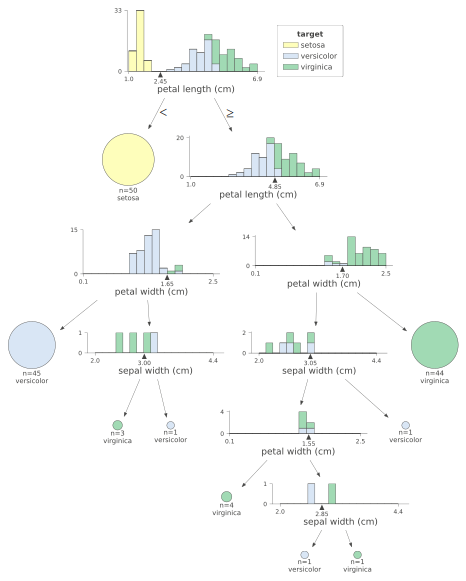

<Figure size 1080x1080 with 0 Axes>

In [ ]:
# pip install dtreeviz
from dtreeviz.trees import dtreeviz
viz = dtreeviz(dtc, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))
viz
# viz.save("decision_tree.svg")

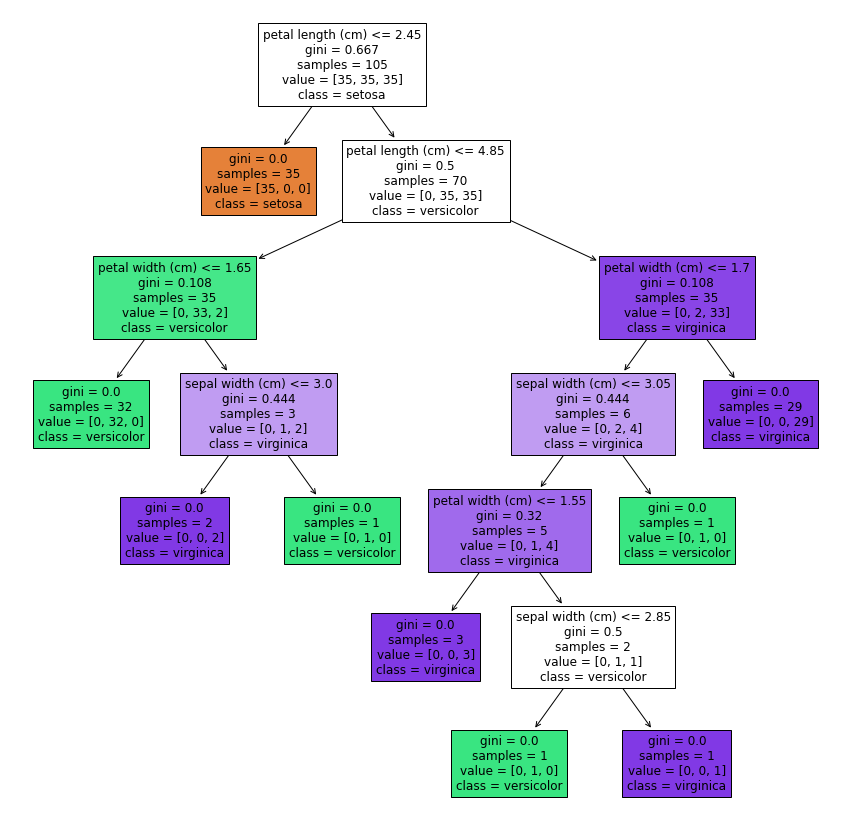

In [ ]:
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(dtc, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

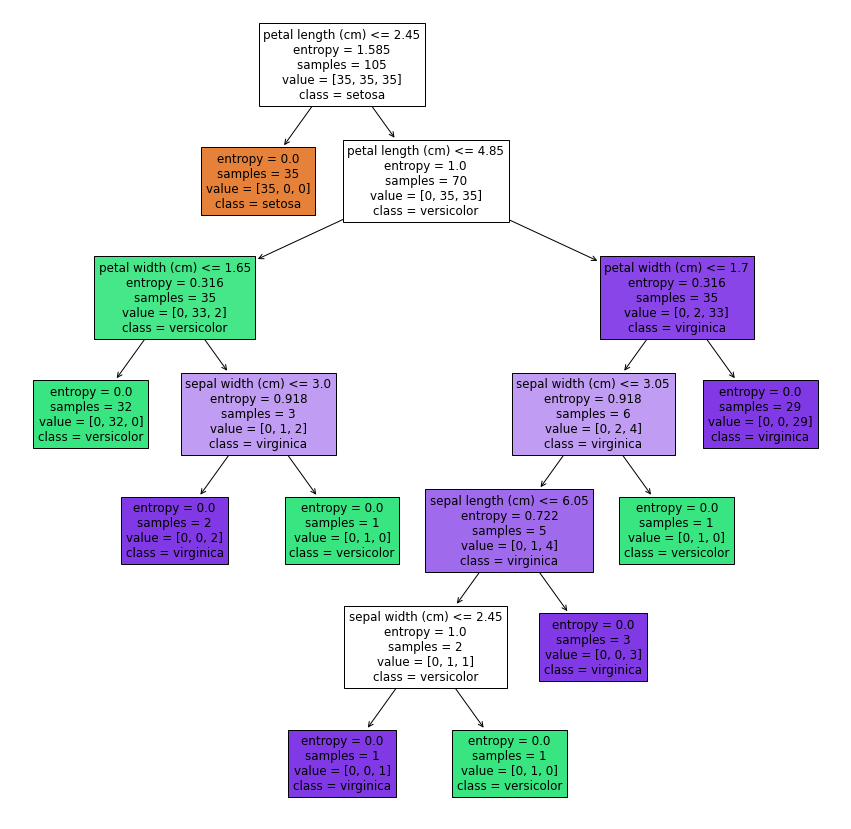

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(dtc, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

### Optimize Parameter (Decision Tree)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,:2]
y = iris.target
            
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, stratify=y)

In [ ]:
pd.DataFrame(X,columns=iris.feature_names[:2])

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV, cross_val_score
param_grid = {'criterion':['gini','entropy'], 'max_depth' :[3,5,7,20]}
gs_inst = GridSearchCV(dtc,param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)
y_pred_gs = gs_inst.predict(X_test)

In [ ]:
print(gs_inst.best_score_)
gs_inst.best_params_

0.8095238095238095


{'criterion': 'gini', 'max_depth': 3}

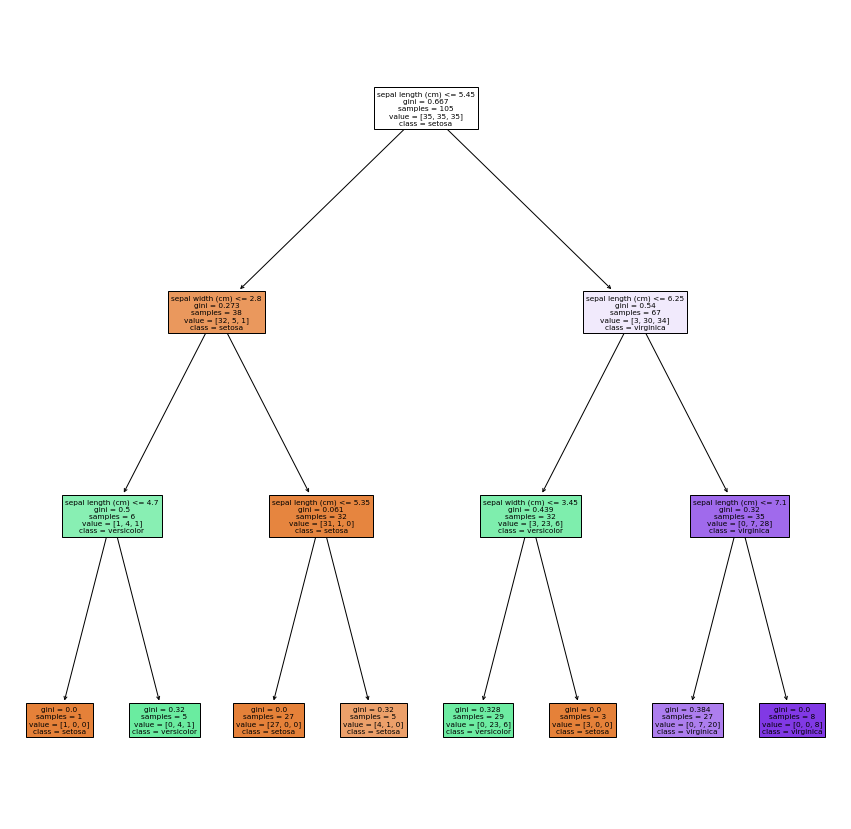

In [ ]:
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(gs_inst.best_estimator_, feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

Text(0, 0.5, 'Cross-validation Score')

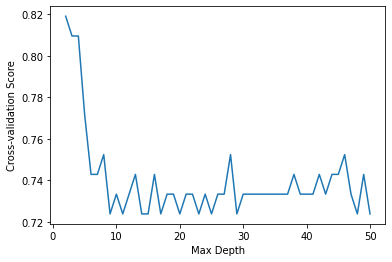

In [ ]:
dtc = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV, cross_val_score
max_depths = range(2,51)
param_grid = {'max_depth' : max_depths}
gs_inst = GridSearchCV(dtc, param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)

plt.plot(max_depths,gs_inst.cv_results_['mean_test_score'])
plt.xlabel('Max Depth')
plt.ylabel("Cross-validation Score")

## Decision Tree Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X_feature_names = ['age', 'gender', 'body mass index', 'average blood pressure','bl_0','bl_1','bl_2','bl_3','bl_4','bl_5']

binned_y = np.digitize(y, 50*np.arange(8))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=binned_y)

### Optimize Parameter (Decision Tree Reg)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV
gs_inst = GridSearchCV(dtr, param_grid = {'max_depth':[3,5,7,9,20]},cv=10)
gs_inst.fit(X_train, y_train)
gs_inst.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = gs_inst.predict(X_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

47.14544300001764

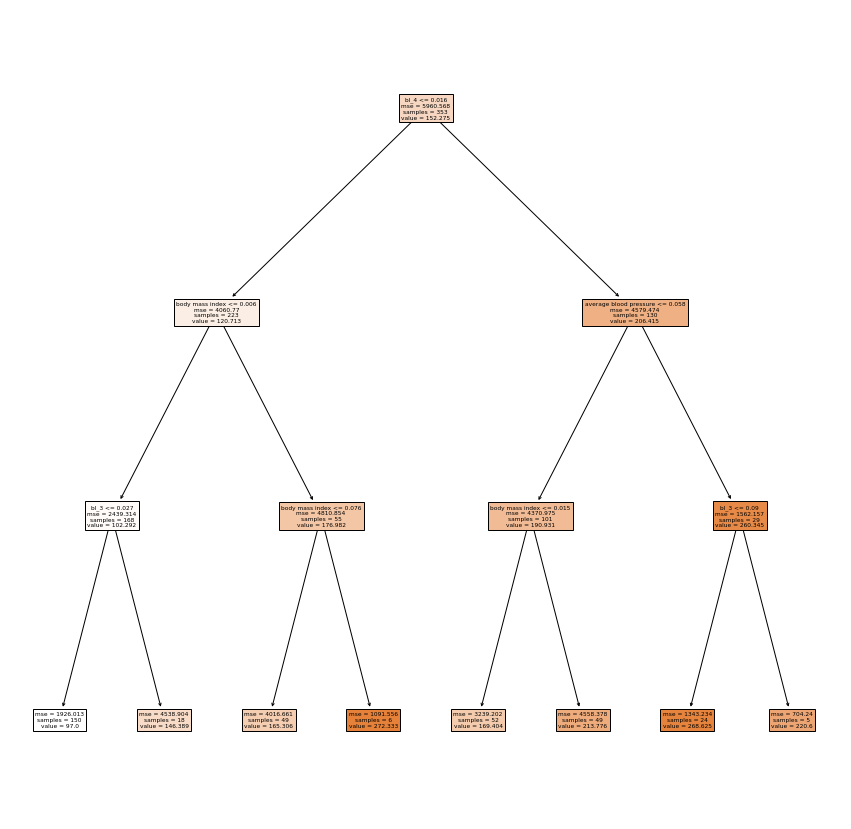

In [ ]:
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(gs_inst.best_estimator_, feature_names=X_feature_names,filled=True)

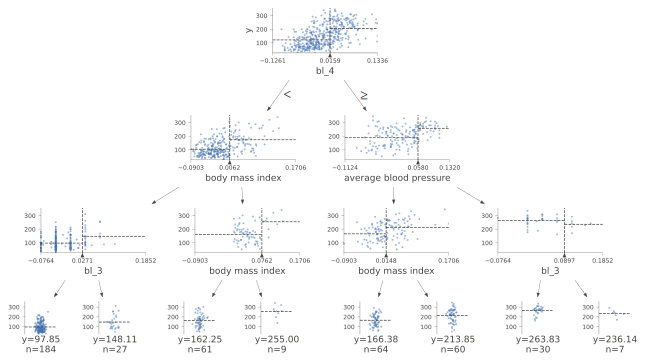

In [ ]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(gs_inst.best_estimator_, X, y,
                target_name="y",
                feature_names=X_feature_names)
viz

## Random Forest

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X_feature_names = ['age', 'gender', 'body mass index', 'average blood pressure','bl_0','bl_1','bl_2','bl_3','bl_4','bl_5']

binned_y = np.digitize(y, 50*np.arange(8))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=binned_y)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rft = RandomForestRegressor()
rft.fit(X_train, y_train)
y_pred = rft.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

45.217640449438214

## Bagging Regression (KNN)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X_feature_names = ['age', 'gender', 'body mass index', 'average blood pressure','bl_0','bl_1','bl_2','bl_3','bl_4','bl_5']
bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=binned_y)

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
             'max_samples': [0.5,1.0],
             'max_features' : [0.5,1.0],
             'oob_score' : [True, False],
             'base_estimator__n_neighbors': [3,5],
             'n_estimators': [100]
             }
# Run bagging regression
single_estimator = KNeighborsRegressor()
ensemble_estimator = BaggingRegressor(base_estimator =single_estimator)

In [ ]:
pre_gs_inst_bag = RandomizedSearchCV(ensemble_estimator,param_distributions = param_dist,cv=3,n_iter = 5)
pre_gs_inst_bag.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                                 leaf_size=30,
                                                                                 metric='minkowski',
                                                                                 metric_params=None,
                                                                                 n_jobs=None,
                                                                                 n_neighbors=5,
                                                                                 p=2,
                                                                                 weights='uniform'),
                                              bootstrap=True,
                                              bootstrap_features=False,
                                              max_f

In [ ]:
pre_gs_inst_bag.best_params_

{'base_estimator__n_neighbors': 3,
 'max_features': 0.5,
 'max_samples': 1.0,
 'n_estimators': 100,
 'oob_score': False}

In [ ]:
 rs_bag = BaggingRegressor(**{'max_features': 1.0,
            'max_samples': 0.5,
            'n_estimators': 1000,
            'oob_score': True,
            'base_estimator': KNeighborsRegressor(n_neighbors=5)})
rs_bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=5,
                                                    p=2, weights='uniform'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=0.5, n_estimators=1000, n_jobs=None,
                 oob_score=True, random_state=None, verbose=0,
                 warm_start=False)

In [ ]:
 y_pred = rs_bag.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error
print("R-squared",r2_score(y_test, y_pred))
print("MAE : ",mean_absolute_error(y_test, y_pred))
print("MAPE : ",(np.abs(y_test - y_pred)/y_test).mean())

R-squared 0.36576108585335765
MAE :  50.832752808988744
MAPE :  0.45039857767250807


## Gradiant Boost Trees

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
cali_housing = fetch_california_housing()
X = cali_housing.data
y = cali_housing.target
bins = np.arange(6)
binned_y = np.digitize(y, bins)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=binned_y)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'max_features' : ['log2',1.0],
             'max_depth' : [3, 5, 7, 10],
             'min_samples_leaf' : [2, 3, 5, 10],
             'n_estimators': [50, 100],
             'learning_rate' : [0.0001,0.001,0.01,0.05,0.1,0.3],
             'loss' : ['ls','huber']
             }
pre_gs_inst =RandomizedSearchCV(GradientBoostingRegressor(warm_start=True),param_distributions = param_dist,
                                cv=3,n_iter = 30, n_jobs=-1)
pre_gs_inst.fit(X_train, y_train)

# Classification (LDA, SGD)

In [10]:
from sklearn import datasets
X, y = datasets.make_classification(n_samples = 500)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

## LDA

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [14]:
y_pred = lda.predict(X_test)
result_table(y_test, y_pred)

[[52 11]
 [ 6 56]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        63
           1       0.84      0.90      0.87        62

    accuracy                           0.86       125
   macro avg       0.87      0.86      0.86       125
weighted avg       0.87      0.86      0.86       125



## QDA (nonlinear LDA)

In [15]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
qda.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [16]:
y_pred = qda.predict(X_test)
result_table(y_test, y_pred)

[[43 20]
 [ 9 53]]
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        63
           1       0.73      0.85      0.79        62

    accuracy                           0.77       125
   macro avg       0.78      0.77      0.77       125
weighted avg       0.78      0.77      0.77       125

